# BANK LOAN ANALYSIS REPORT

### IMPORT LIBRARY

In [3]:
import pandas as pd
import mysql.connector
import os

# List of Excel files and their corresponding table names
excel_files = [
    ('financial_loan.xlsx', 'financial_loan')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='N2109@#itin',
    database='bankloan'
)
cursor = conn.cursor()

# Folder containing the Excel file
folder_path = 'F:/gayatri11/data analytics projects/bank loan analysis - python project'

# Function to map pandas datatypes to MySQL datatypes
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Process the Excel file
for excel_file, table_name in excel_files:
    file_path = os.path.join(folder_path, excel_file)

    # Read Excel file
    df = pd.read_excel(file_path)

    # Replace NaN with None (SQL NULL)
    df = df.where(pd.notnull(df), None)

    print(f"Processing {excel_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate CREATE TABLE statement
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert data into MySQL
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit each file
    conn.commit()

# Close database connection
conn.close()


Processing financial_loan.xlsx
NaN values before replacement:
id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64



In [2]:
!pip install plotly --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 738.3 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.9 MB 738.3 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.9 MB 766.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.9 MB 802.5 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.9 MB 802


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
import plotly.express as px

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "N2109@#itin",
                             database = "bankloan")

cur = db.cursor()

In [2]:
# to import the data(other option)
df= pd.read_excel("F:/gayatri11/data analytics projects/bank loan analysis - python project/financial_loan.xlsx")

In [22]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [23]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


#### METADATA OF DATA

In [24]:
print("no. of rows: ", df.shape[0])

no. of rows:  38576


In [25]:
print("no. of columns: ", df.shape[1])

no. of columns:  24


In [26]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

#### DATATYPES

In [27]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [28]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### total loan application

In [29]:
total_loan_applications = df['id'].count()
print("Total Loan Application: ", total_loan_applications)

Total Loan Application:  38576


### MTD Total loan Applications

In [30]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()
print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications (for December 2021):4314


### Total Funded Amount

In [31]:
total_funded_amount =df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M". format( total_funded_amount_millions))

Total Funded Amount: $435.76M


### MTD - Total Funded Amount

In [32]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded amount: ${:.2f}M".format(mtd_total_funded_amount_millions))
#print("MTD Total Funded amount" , mtd_total_funded_amount_millions)

MTD Total Funded amount: $53.98M


### Total Amount Received

In [33]:
total_amount_received =df['total_payment'].sum()
total_amount_received_millions = total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M". format( total_amount_received_millions))

Total Funded Amount: $435.76M


### MTD Total Amount Received 

In [34]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print("MTD Total amount Received: ${:.2f}M".format(mtd_total_amount_received_millions))

MTD Total amount Received: $58.07M


### Average interest rate

In [35]:
average_interest_rate = df['int_rate'].mean()*100
print("Avg Interest Rate:{:.2f}% ". format(average_interest_rate))

Avg Interest Rate:12.05% 


### Avg debt-to-income ratio (DTI)

In [36]:
average_dti = df['dti'].mean()*100
print("Avg debt-to-income ratio:{:.2f}% ". format(average_dti))

Avg debt-to-income ratio:13.33% 


### Good loan Matrix

In [39]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]  #good loans

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received /1000000

good_loan_percentage =(good_loan_applications /total_loan_applications) *100

print("Good Loan Application: ",good_loan_applications)
print("Good Loan Funded Amount (in Millions) : ${:.2f}M" . format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions) : ${:.2f}M" . format(good_loan_received_millions))
print("Percentage of Good Loan Application : {:.2f}%" . format(good_loan_percentage))

Good Loan Application:  33243
Good Loan Funded Amount (in Millions) : $370.22M
Good Loan Total Received (in Millions) : $435.79M
Percentage of Good Loan Application : 86.18%


### bad loan matrix

In [41]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]  #bad loans

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received /1000000

bad_loan_percentage =(bad_loan_applications /total_loan_applications) *100

print("Bad Loan Application: ",bad_loan_applications)
print("Bad Loan Funded Amount (in Millions) : ${:.2f}M" . format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions) : ${:.2f}M" . format(bad_loan_received_millions))
print("Percentage of Bad Loan Application : {:.2f}%" . format(bad_loan_percentage))

Bad Loan Application:  5333
Bad Loan Funded Amount (in Millions) : $65.53M
Bad Loan Total Received (in Millions) : $37.28M
Percentage of Bad Loan Application : 13.82%


# Charts

### monthly trends by issue  date fro tatal funded amount

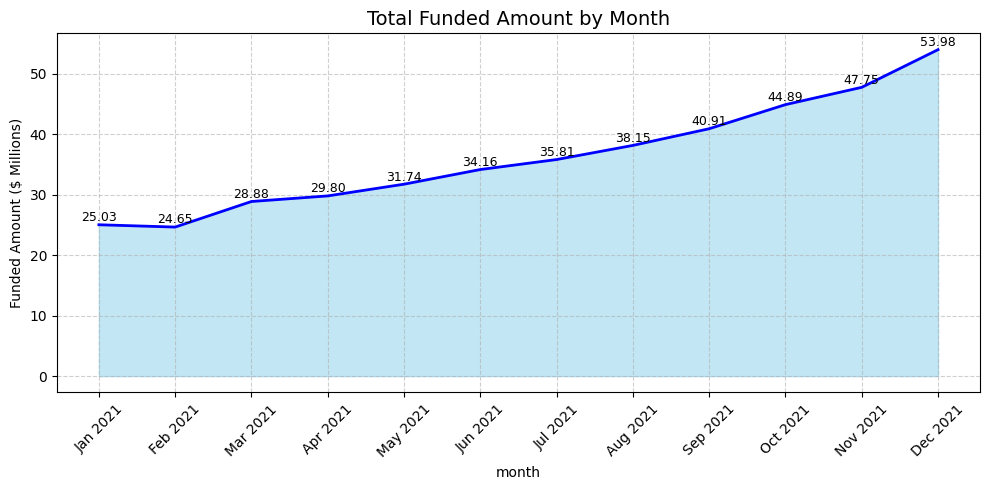

In [46]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x:x['issue_date'].dt.strftime("%b %Y"))

    .groupby('month_name',sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions') )

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i , row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] +0.1, f"{row['loan_amount_millions']:.2f}",
             ha = 'center', va ='bottom', fontsize = 9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('month')
plt.ylabel('Funded Amount ($ Millions)' )
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'],rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### monthly trends by issue date for total amount received

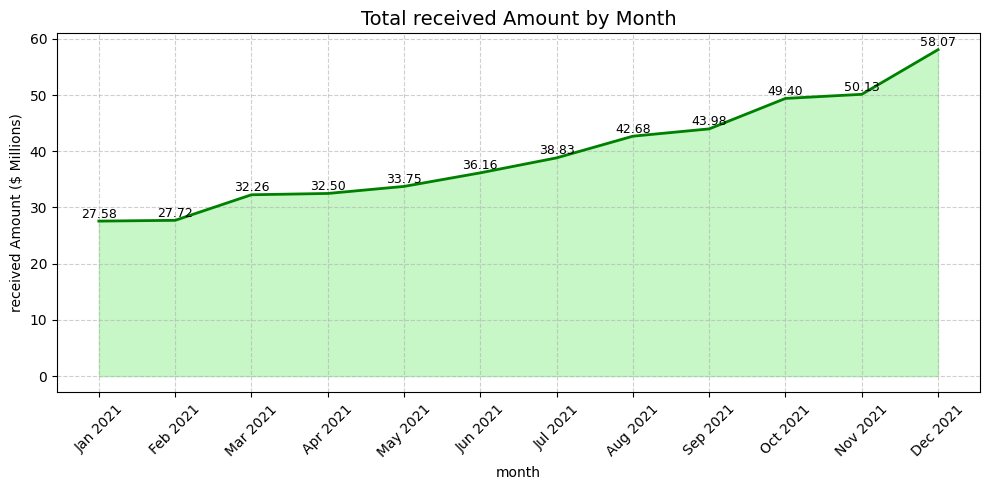

In [52]:
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x:x['issue_date'].dt.strftime("%b %Y"))

    .groupby('month_name',sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='received_amount_millions') )

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received['received_amount_millions'], color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'], color='green', linewidth=2)

for i , row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] +0.1, f"{row['received_amount_millions']:.2f}",
             ha = 'center', va ='bottom', fontsize = 9, rotation=0, color='black')

plt.title('Total received Amount by Month', fontsize=14)
plt.xlabel('month')
plt.ylabel('received Amount ($ Millions)' )
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'],rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### Regional Analysis by States for funded amount

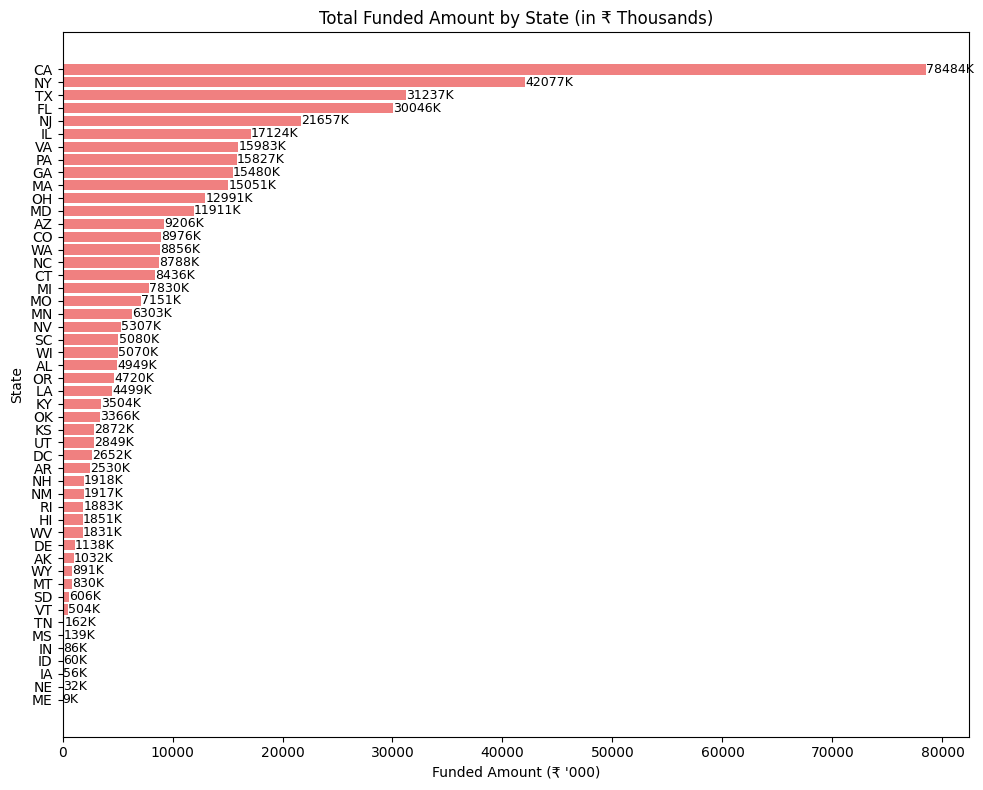

In [3]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Total Loan analysis by total funded amount

NameError: name 'color' is not defined

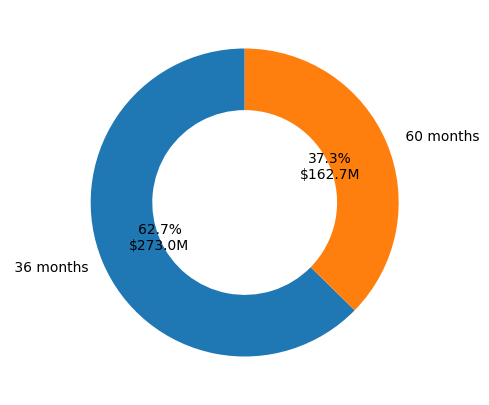

In [12]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle(((0, 0), 0.70, color== 'white')))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

### Employee Length Analysis

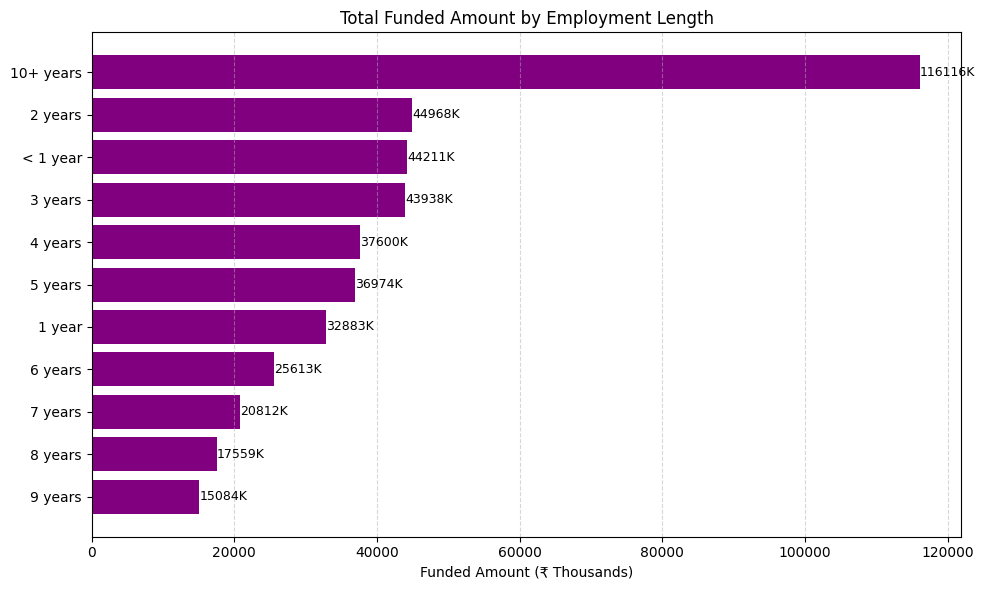

In [6]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, 
             bar.get_y() + bar.get_height() / 2,
             f"{width:.0f}K",
             va='center', fontsize=9)

plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Loan Purpose Breakdown 

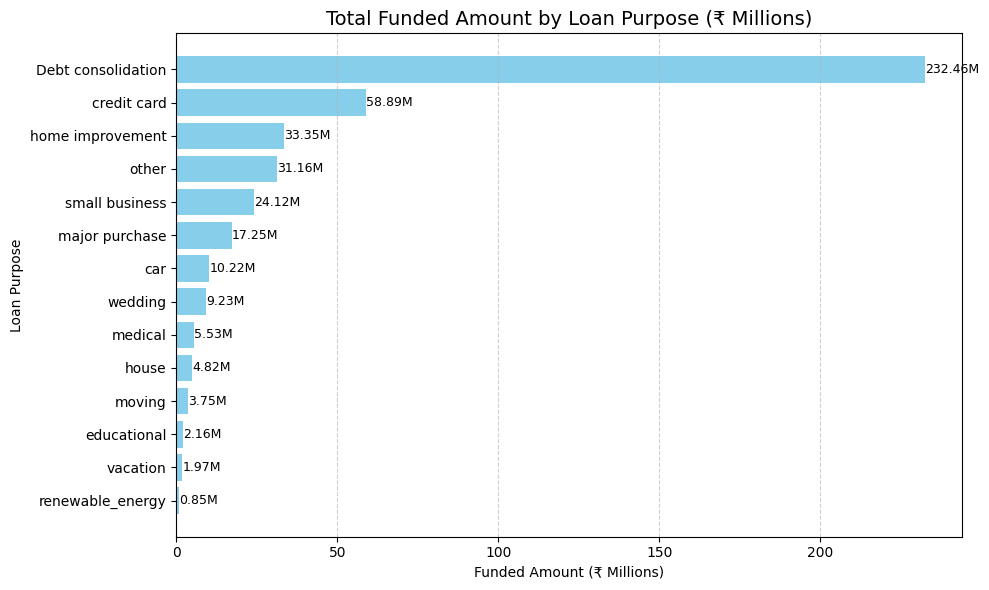

In [7]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}M', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Funded Amount (₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Home Ownership Analysis 

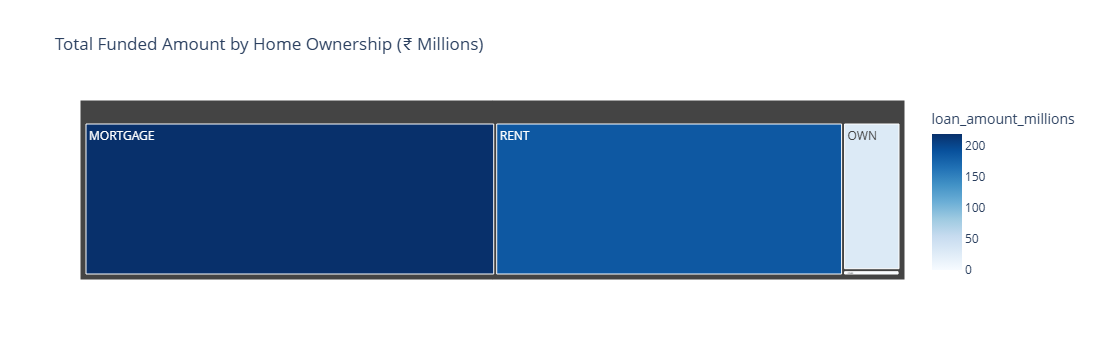

In [13]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()